In [14]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
from tqdm import tqdm
import os

In [3]:
#plt.rcParams.update({'font.size': 10})
#plt.rcParams['axes.linewidth'] = 1.5
#plt.rcParams['font.family'] = 'serif'
#plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
#plt.rcParams.update({
#    "text.usetex": True,
#})

In [4]:
def transform_bit(state):
    newbit = (state ^(state >> 2) ^ (state >>4) ^(state >> 13)) &1
    state = (state >> 1) | (newbit << 13)
    return state
    

In [5]:
M = 50
N = 50*2**14
state = np.random.randint(2**14, size=M)
states = np.zeros((N, state.shape[0]))
for i in tqdm(range(N)):
    for j in range(M):
        state[j] = transform_bit(state[j])
        states[i,j] = state[j]

  0%|          | 0/819200 [00:00<?, ?it/s]

100%|██████████| 819200/819200 [00:45<00:00, 17982.76it/s]


In [10]:
print(scipy.stats.shapiro(states.sum(axis=1)))

ShapiroResult(statistic=1.0002566576004028, pvalue=1.0)


/Users/oscarkremer/miniconda3/lib/python3.8/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [11]:
white = states.sum(axis=1)/(M*(2**14-1))
white = 2*(white-0.5)

In [ ]:
w

In [16]:
plt.hist(white)
plt.show()

FileNotFoundError: missing font metrics file: cmr10

<Figure size 640x480 with 1 Axes>

In [9]:
clock_cycle = 64*8e-9

In [12]:
sum_brown = 0
brown_noise = np.zeros((white.shape[0]))
pink_noise = np.zeros((white.shape[0]-1))
window=10000
factor = 0.05
for i in range(brown_noise.shape[0]):
    brown_noise[i] = factor*(white[i-window:i+1].sum())
pink_noise = np.diff(white)

In [13]:
f_white, power_white = scipy.signal.periodogram(white, fs=1/clock_cycle, window='hamming', nfft=(2**15))
f_brown, power_brown = scipy.signal.periodogram(brown_noise, fs=1/clock_cycle, window='hamming', nfft=(2**15))
f_pink, power_pink = scipy.signal.periodogram(pink_noise, fs=1/clock_cycle, window='hamming', nfft=(2**15))

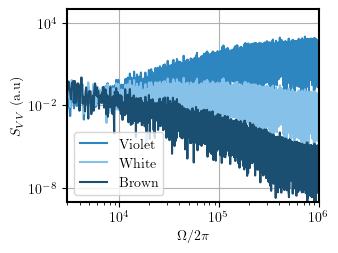

In [40]:
colors = ['#2E86C1', '#85C1E9', '#1B4F72']
fig = plt.figure(figsize=(5.4*1.3*10, 10*4.2))
fig.set_size_inches(2.5*1.3, 2.5, forward=True)

plt.plot(f_pink, 2000*power_pink/power_white.max(), color=colors[0], label="Violet")
plt.plot(f_white, power_white/power_white.max(), color=colors[1], label="White")
plt.plot(f_brown, 0.08*power_brown/power_white.max(), color=colors[2], label="Brown")
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$\Omega/2\pi$')
plt.ylabel(r'$S_{VV}$ (a.u)')

plt.xlim([3e3, 1e6])
plt.yticks([1e-8, 1e-2, 1e4])
plt.ylim([1e-9, 1e5])
plt.legend()
plt.grid()
plt.savefig('../../plots/Chapter 6/noise.pdf', dpi=300, bbox_inches = 'tight')
plt.show()


In [ ]:
z1 = np.sqrt(-1000*np.log(states1))*np.cos(2*np.pi*states2)
#z1 = sigma*z1
plt.hist(z1, bins=30)
plt.title('{} mean - {} std'.format(np.round(z1.mean(),3), np.round(z1.std(),3)))
plt.show()

In [ ]:
plt.hist(states, bins=16383)
plt.show()

In [4]:
2**14

16384

In [26]:
D = 147e-9
r = D/2
rho = 2200
m = rho*4*np.pi*(np.power(r,3))/3

In [29]:
kb = 1.380648e-23
T = 293
kb*T

4.045298639999999e-21

In [30]:
f = 83e3
omega = 2*np.pi*f

In [31]:
k = omega*omega*m

In [32]:
k

9.951515616125687e-07